# Basic Test

In [1]:

from imports import *
from agents import *
from environment import *
from simulations import *
from utils import *

# Environment Testing

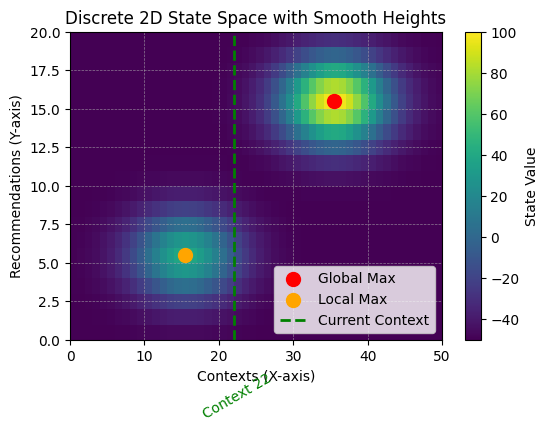

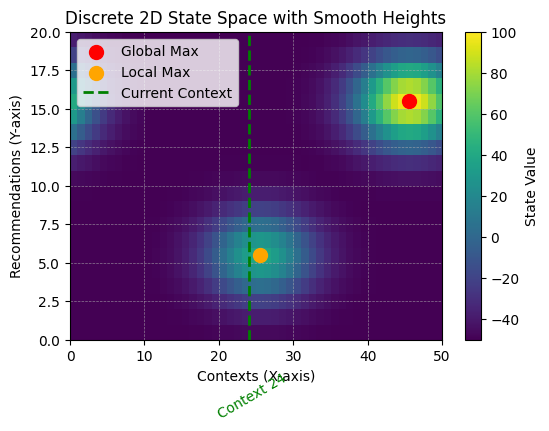

[22, np.int64(25), np.int64(21), np.int64(22), np.int64(20), np.int64(24), np.int64(20), np.int64(24), np.int64(29), np.int64(28), np.int64(24)]


In [2]:
ere = ExogenousRewardEnvironment()
ere.do_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

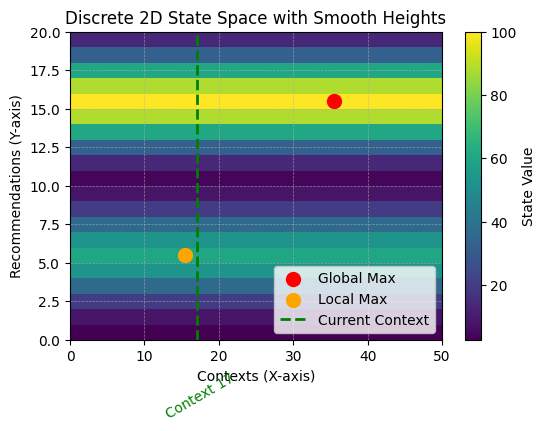

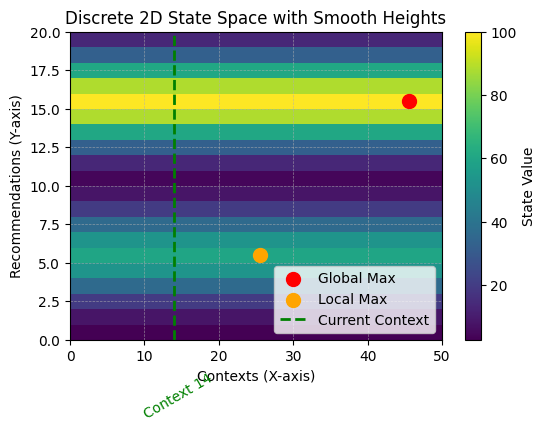

[17, np.int64(18), np.int64(22), np.int64(17), np.int64(16), np.int64(17), np.int64(15), np.int64(16), np.int64(11), np.int64(9), np.int64(14)]


In [3]:
ere = ExogenousRewardEnvironment()
ere.do_rows_gaussian_smoothing()
ere.visualize_landscape(mark_context=True)
for steps in (range(10)):
  ere.step_context()
  ere.shift_environment_right()
ere.visualize_landscape(mark_context=True)
print(ere.get_context_history())

# Simulation Testing

## Stationary and Initiation

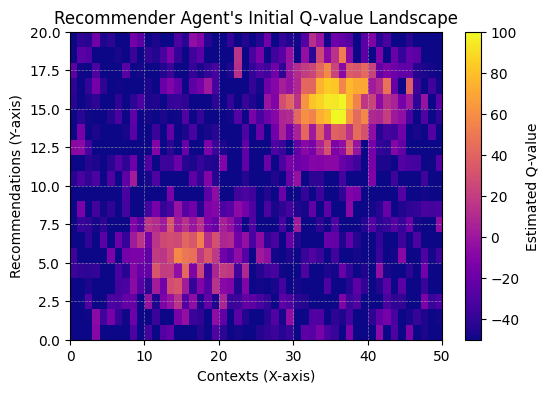

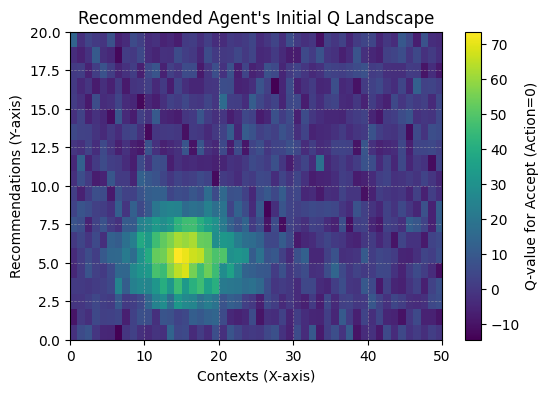

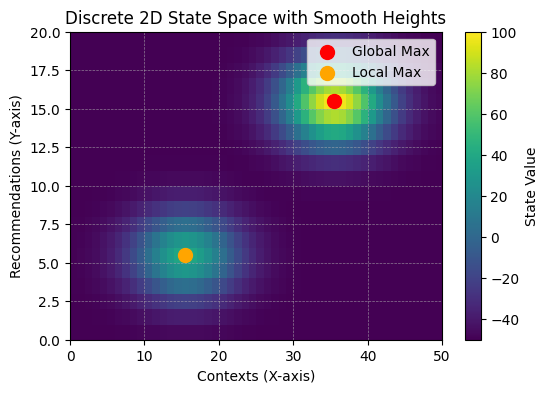

Running Simulation: 100%|██████████| 100000/100000 [00:07<00:00, 13156.37it/s]


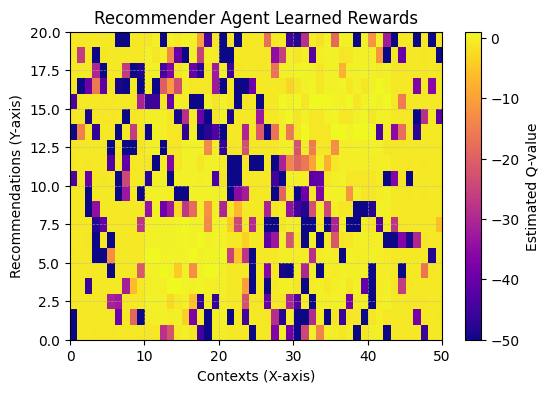

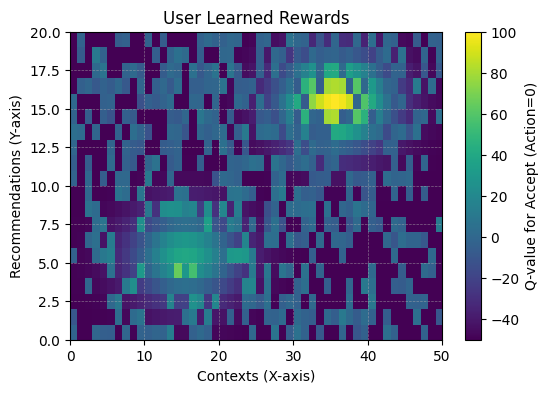

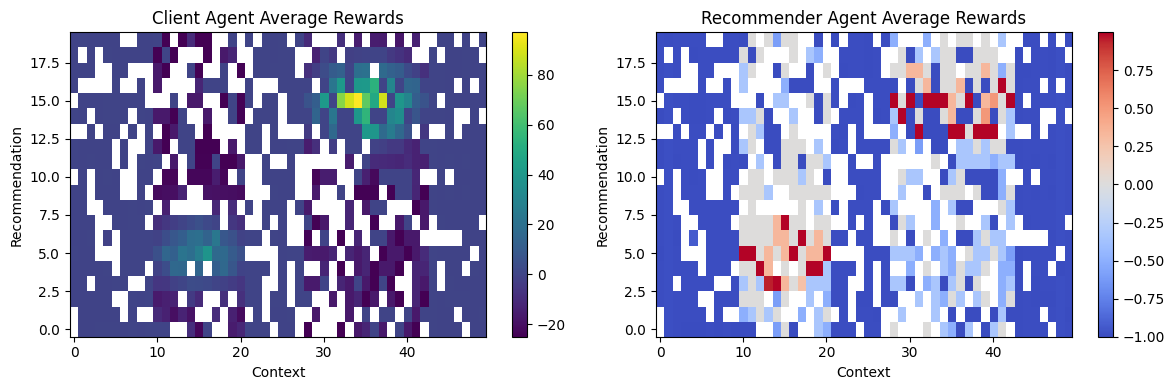

In [6]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 100000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended = True,
                                    landscape_type='default',
                                    stationarity=True, type='ucb')
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])
# plot_environment_vs_agent(results["environment_state_space"], results["average_reward_map"])

## Non-Stationary and Initiation


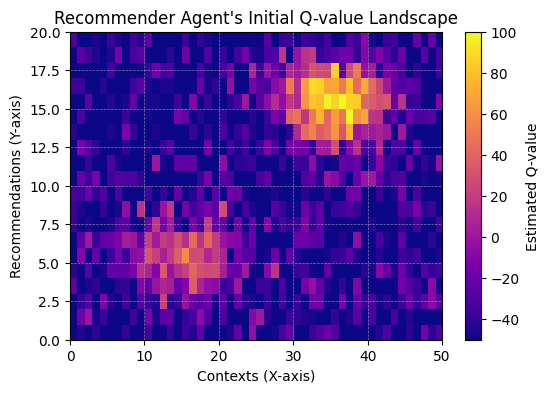

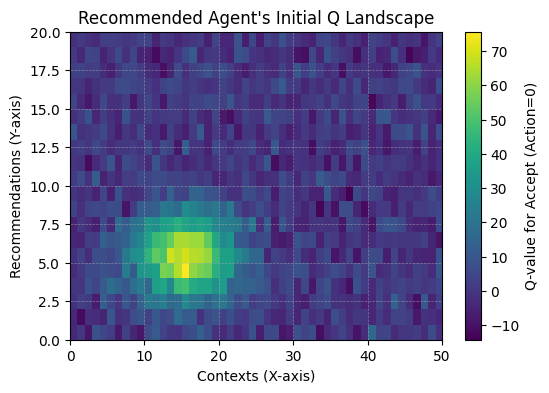

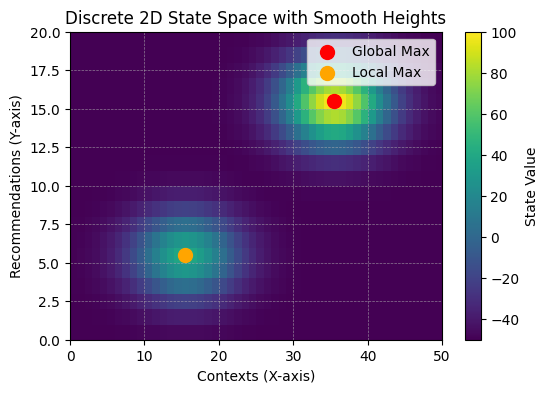

Running Simulation: 100%|██████████| 100000/100000 [00:11<00:00, 8618.02it/s]


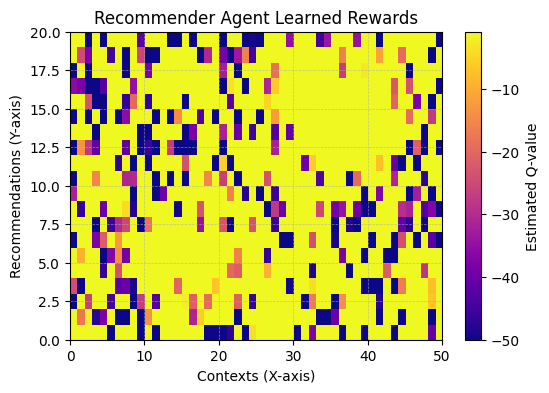

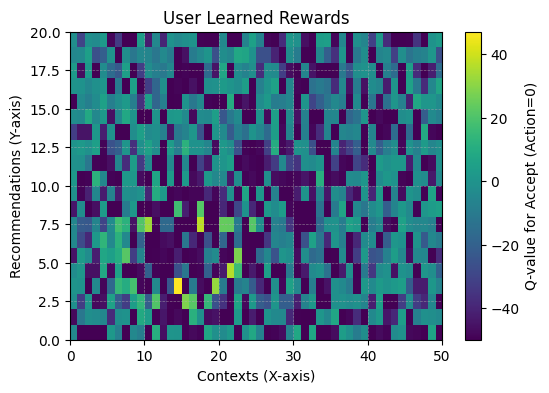

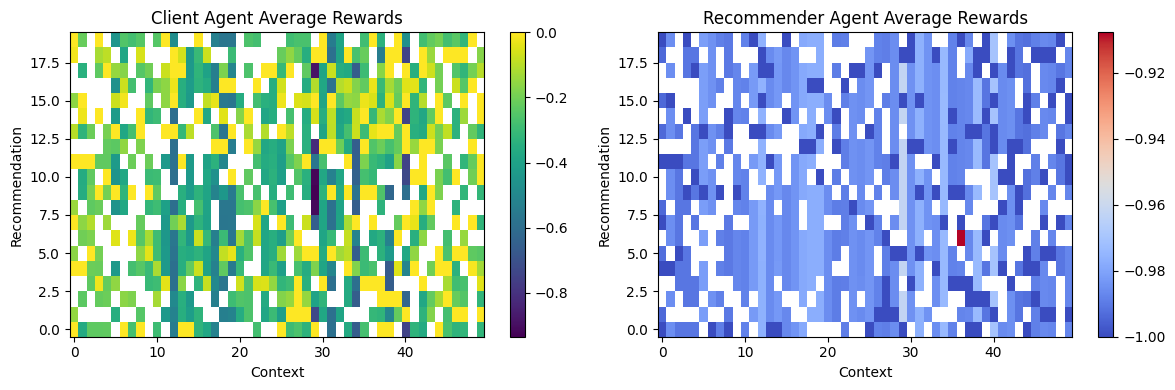

In [5]:
results = run_recommender_simulation(RecommenderAgent,
                                    RecommendedAgent,
                                    ExogenousRewardEnvironment,
                                    n_recommendations=20,
                                    n_contexts=50,
                                    n_steps = 100000,
                                    exploration_rate=1,
                                    exploration_decay=0.999,
                                    initialize_recommender = True,
                                    initialize_recommended= True,
                                    stationarity=False, type='ucb')
plot_full_results(results["environment_state_space"], results["average_reward_map"], results["average_recommender_map"])